# Covid 19 Prediction, Covid 19 patient's admission to the ward using Supervised Machine Learning.

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Import Libraries

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')

Load data

In [ ]:
pip install openpyxl

In [ ]:
data = pd.read_excel("/content/dataset.xlsx", engine="openpyxl")

Getting to know the data!

In [ ]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Feature Engineering!

In [ ]:
data.columns = [x.lower().strip().replace(' ','_') for x in data.columns]

In [ ]:
def miss_data(x):
    total = x.isnull().sum()
    percent = (x.isnull().sum()/x.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(x[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
miss_data(data)

,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
Total,0,0,0,0,0,0,5041,5041,5042,5045,...,5617,5617,5617,5617,5617,5617,5617,5624,5624,5617
Percent,0.0,0.0,0.0,0.0,0.0,0.0,89.316088,89.316088,89.333806,89.38696,...,99.521616,99.521616,99.521616,99.521616,99.521616,99.521616,99.521616,99.645641,99.645641,99.521616
Types,object,int64,object,int64,int64,int64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [ ]:
for x in data.columns:
    if data[x].dtype=='float16' or  data[x].dtype=='float32' or  data[x].dtype=='float64':
        data[x].fillna(data[x].mean())

data = data.fillna(-999)

for y in data.columns:
    if data[y].dtype=='object':
        lbl = LabelEncoder()
        lbl.fit(list(data[y].values))
        data[y] = lbl.transform(list(data[y].values))

In [ ]:
threshold = 0.92

corr_matrix = data.corr().abs()
corr_matrix.head()

,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
patient_id,1.000000,0.014136,0.018664,0.003748,0.004803,0.000162,0.002173,0.002167,0.001974,0.002017,...,0.002856,0.002832,0.002847,0.002854,0.002839,0.002840,0.002850,0.005929,0.007077,0.002847
patient_age_quantile,0.014136,1.000000,0.075244,0.046166,0.015736,0.035772,0.109140,0.109128,0.109860,0.107703,...,0.051720,0.051703,0.051778,0.051778,0.051743,0.051749,0.051730,0.050366,0.020413,0.051732
sars-cov-2_exam_result,0.018664,0.075244,1.000000,0.142437,0.019364,0.027586,0.044974,0.044976,0.045045,0.042017,...,0.088889,0.088836,0.088889,0.088910,0.088845,0.088849,0.088910,0.070122,0.009768,0.088905
"patient_addmited_to_regular_ward_(1=yes,_0=no)",0.003748,0.046166,0.142437,1.000000,0.011264,0.010192,0.241889,0.241885,0.242051,0.238041,...,0.144795,0.144685,0.144753,0.144797,0.144703,0.144710,0.144771,0.145138,0.007105,0.144815
"patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)",0.004803,0.015736,0.019364,0.011264,1.000000,0.008087,0.224213,0.224218,0.224609,0.225239,...,0.267281,0.267521,0.267400,0.267417,0.267440,0.267432,0.267359,0.153438,0.185337,0.267463


In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper.head()

,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
patient_id,NaN,0.014136,0.018664,0.003748,0.004803,0.000162,0.002173,0.002167,0.001974,0.002017,...,0.002856,0.002832,0.002847,0.002854,0.002839,0.002840,0.002850,0.005929,0.007077,0.002847
patient_age_quantile,NaN,NaN,0.075244,0.046166,0.015736,0.035772,0.109140,0.109128,0.109860,0.107703,...,0.051720,0.051703,0.051778,0.051778,0.051743,0.051749,0.051730,0.050366,0.020413,0.051732
sars-cov-2_exam_result,NaN,NaN,NaN,0.142437,0.019364,0.027586,0.044974,0.044976,0.045045,0.042017,...,0.088889,0.088836,0.088889,0.088910,0.088845,0.088849,0.088910,0.070122,0.009768,0.088905
"patient_addmited_to_regular_ward_(1=yes,_0=no)",NaN,NaN,NaN,NaN,0.011264,0.010192,0.241889,0.241885,0.242051,0.238041,...,0.144795,0.144685,0.144753,0.144797,0.144703,0.144710,0.144771,0.145138,0.007105,0.144815
"patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)",NaN,NaN,NaN,NaN,NaN,0.008087,0.224213,0.224218,0.224609,0.225239,...,0.267281,0.267521,0.267400,0.267417,0.267440,0.267432,0.267359,0.153438,0.185337,0.267463


In [ ]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
dataset = data.drop(columns = to_drop)
print('Data shape: ', data.shape)
print('Size of the data', data.shape)

There are 64 columns to remove.
Data shape:  (5644, 111)
Size of the data (5644, 111)


In [ ]:
data_missing = (data.isnull().sum() / len(data)).sort_values(ascending = False)
data_missing.head()

patient_id              0.0
myeloblasts             0.0
urine_-_sugar           0.0
urine_-_protein         0.0
urine_-_urobilinogen    0.0
dtype: float64

In [ ]:
data_missing_ = data_missing.index[data_missing > 0.85]
all_missing = list(set(data_missing_))

In [ ]:
dataset = dataset.drop(columns = all_missing)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 47 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   patient_id                                             5644 non-null   int64  
 1   patient_age_quantile                                   5644 non-null   int64  
 2   sars-cov-2_exam_result                                 5644 non-null   int64  
 3   patient_addmited_to_regular_ward_(1=yes,_0=no)         5644 non-null   int64  
 4   patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  5644 non-null   int64  
 5   patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  5644 non-null   int64  
 6   hematocrit                                             5644 non-null   float64
 7   serum_glucose                                          5644 non-null   float64
 8   respiratory_syncytial_virus                     

In [ ]:
cols = [x for x in dataset.columns if x not in ['patient_id','sars-cov-2_exam_result', 'patient_addmited_to_regular_ward_(1=yes,_0=no)', 'patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)', 'patient_addmited_to_intensive_care_unit_(1=yes,_0=no)']]

In [ ]:
new_df = dataset[cols]

In [ ]:
new_df

,patient_age_quantile,hematocrit,serum_glucose,respiratory_syncytial_virus,mycoplasma_pneumoniae,neutrophils,urea,proteina_c_reativa_mg/dl,potassium,"influenza_b,_rapid_test",...,"prothrombin_time_(pt),_activity",vitamin_b12,creatine_phosphokinase (cpk),ferritin,arterial_lactic_acid,lipase_dosage,d-dimer,albumin,arteiral_fio2,phosphor
0,13,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,17,0.236515,-0.140648,2,-999.0,-0.619086,1.198059,-0.147895,-0.305787,1,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,8,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,5,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,15,-999.000000,-999.000000,2,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5640,17,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5641,4,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5642,10,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,...,-999.0,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


Data Split

In [ ]:
X = new_df
y = dataset['sars-cov-2_exam_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=101)

Feature Importance using Extra Trees Classifier

[2.41697807e-01 8.26575339e-02 3.53229180e-02 3.29855945e-02
 0.00000000e+00 7.74303207e-02 3.64144452e-02 8.30551923e-02
 3.92536360e-02 3.68536425e-02 2.66323204e-02 1.98330591e-02
 3.26221640e-02 8.23072589e-03 2.48868327e-02 6.59830647e-03
 2.20069942e-02 5.85684967e-05 1.26846866e-02 5.83138697e-03
 8.55964652e-03 1.15814114e-02 6.24862012e-03 4.75088528e-03
 1.16056287e-05 0.00000000e+00 1.17468437e-02 3.25184851e-03
 0.00000000e+00 1.28862473e-02 1.42771657e-02 2.71242974e-02
 0.00000000e+00 1.05357833e-04 1.78431652e-02 2.76330018e-03
 2.85409275e-02 7.09019903e-03 0.00000000e+00 9.37992844e-04
 1.52835937e-02 1.94075798e-03]


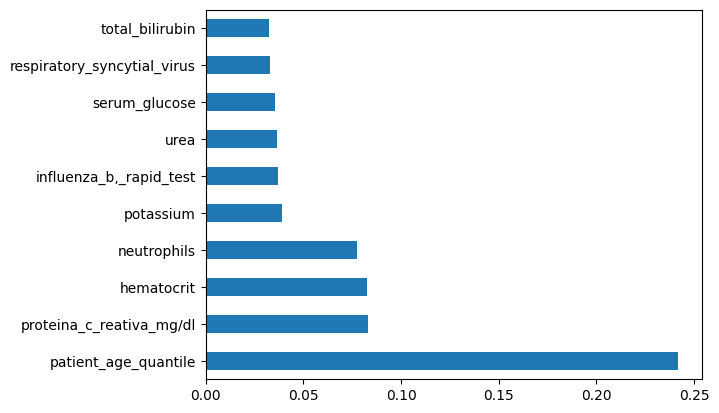

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
feat_head = feat_importances.head(10)
feat_head.index

Index(['patient_age_quantile', 'hematocrit', 'serum_glucose',
       'respiratory_syncytial_virus', 'mycoplasma_pneumoniae', 'neutrophils',
       'urea', 'proteina_c_reativa_mg/dl', 'potassium',
       'influenza_b,_rapid_test'],
      dtype='object')

In [ ]:
X = new_df[feat_head.index]
y = dataset['sars-cov-2_exam_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)

ML Models

In [ ]:
accuracy_lst =[]

def model_assess(model, name='Default'):
    model.fit(X_train, y_train)
    prds = model.predict(X_test)
    model_acc = accuracy_score(y_test, prds)
    accuracy_lst.append(100*model_acc)
    print('---', name, '---', '\n',
          confusion_matrix(y_test, prds), '\n',
          'Accuracy:', (accuracy_score(y_test, prds)), '\n',
          'Classification Report:', (classification_report(y_test, prds)))

In [ ]:
# Logistic Regression
lg = LogisticRegression()
model_assess(lg, 'Logistic Regression')

# Decision Tree
tree = DecisionTreeClassifier()
model_assess(tree, 'Decission Trees')

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, 'Random Forest')

# SVM
svm = SVC()
model_assess(svm, 'SVM')

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, name='KNN')

# XGBOOST
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, 'XGBoost')

# Neural Network
nn = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1)
model_assess(nn, 'Neural Nets')

--- Logistic Regression --- 
 [[1687    0]
 [ 176    0]] 
 Accuracy: 0.90552871712292 
 Classification Report:               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1687
           1       0.00      0.00      0.00       176

    accuracy                           0.91      1863
   macro avg       0.45      0.50      0.48      1863
weighted avg       0.82      0.91      0.86      1863

--- Decission Trees --- 
 [[1657   30]
 [ 170    6]] 
 Accuracy: 0.8926462694578636 
 Classification Report:               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1687
           1       0.17      0.03      0.06       176

    accuracy                           0.89      1863
   macro avg       0.54      0.51      0.50      1863
weighted avg       0.84      0.89      0.86      1863

--- Random Forest --- 
 [[1686    1]
 [ 176    0]] 
 Accuracy: 0.9049919484702094 
 Classification Report:               preci

In [ ]:
model_list = ['Logistic Regression', 'DT', 'Random Forest', 'SVM', 'KNearestNeighbours', 'XGBOOST', 'NN']

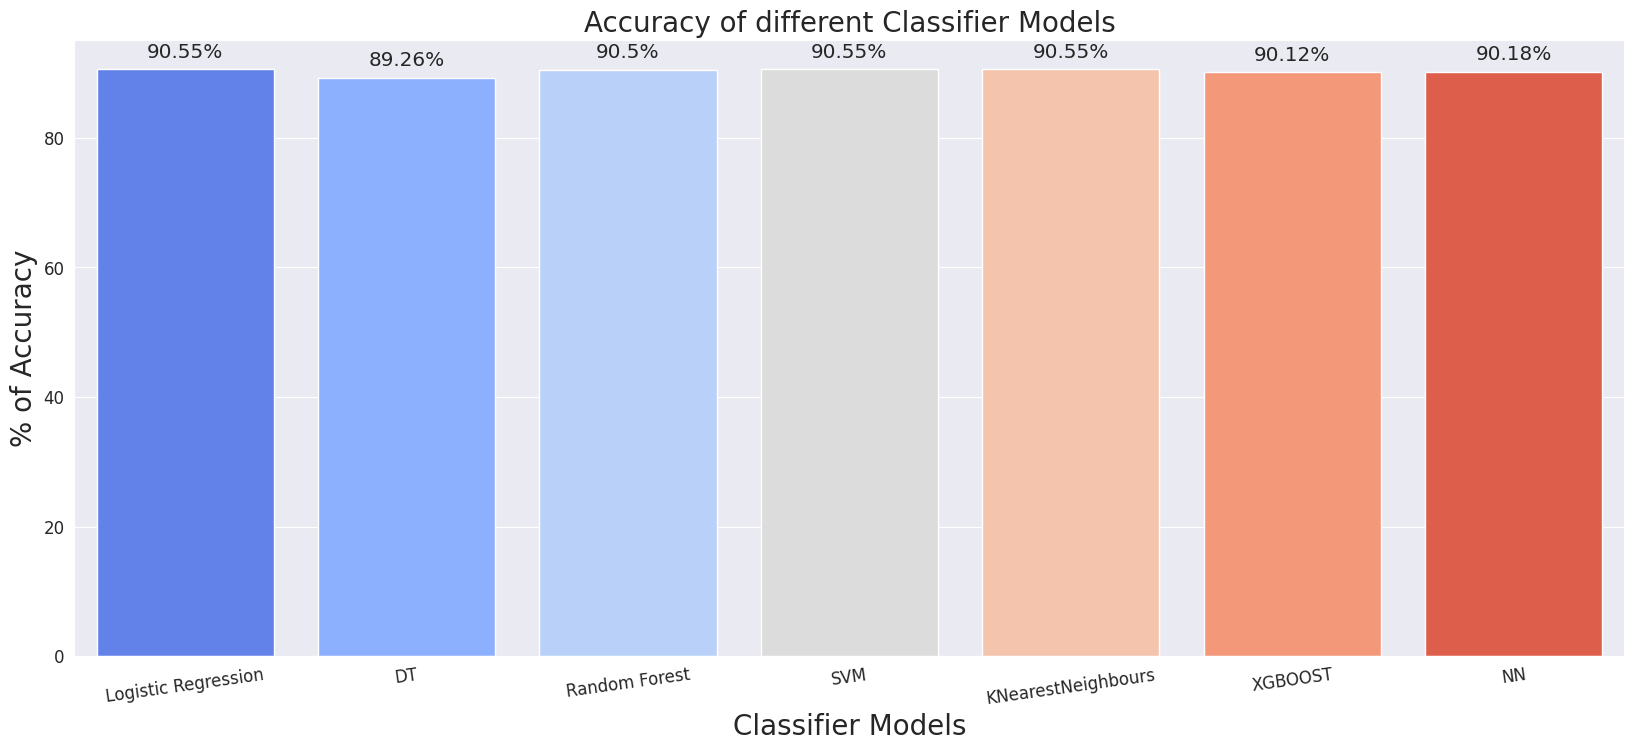

In [ ]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y = accuracy_lst, palette = "coolwarm", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [ ]:
cross_acc = []

ca_lg = cross_val_score(lg, X_train, y_train, scoring='accuracy')
ca_lg = ca_lg.mean()
cross_acc.append(100*ca_lg)

ca_tree = cross_val_score(tree, X_train, y_train, scoring='accuracy')
ca_tree = ca_tree.mean()
cross_acc.append(100*ca_tree)

ca_rforest = cross_val_score(rforest, X_train, y_train, scoring='accuracy')
ca_rforest = ca_rforest.mean()
cross_acc.append(100*ca_rforest)

ca_svm = cross_val_score(svm, X_train, y_train, scoring='accuracy')
ca_svm = ca_svm.mean()
cross_acc.append(100*ca_svm)

ca_knn = cross_val_score(knn, X_train, y_train, scoring='accuracy')
ca_knn = ca_knn.mean()
cross_acc.append(100*ca_knn)

ca_xgb = cross_val_score(xgb, X_train, y_train, scoring='accuracy')
ca_xgb = ca_xgb.mean()
cross_acc.append(100*ca_xgb)

In [ ]:
ca_nn = cross_val_score(nn, X_train, y_train, scoring='accuracy')
ca_nn = ca_nn.mean()
cross_acc.append(100*ca_nn)

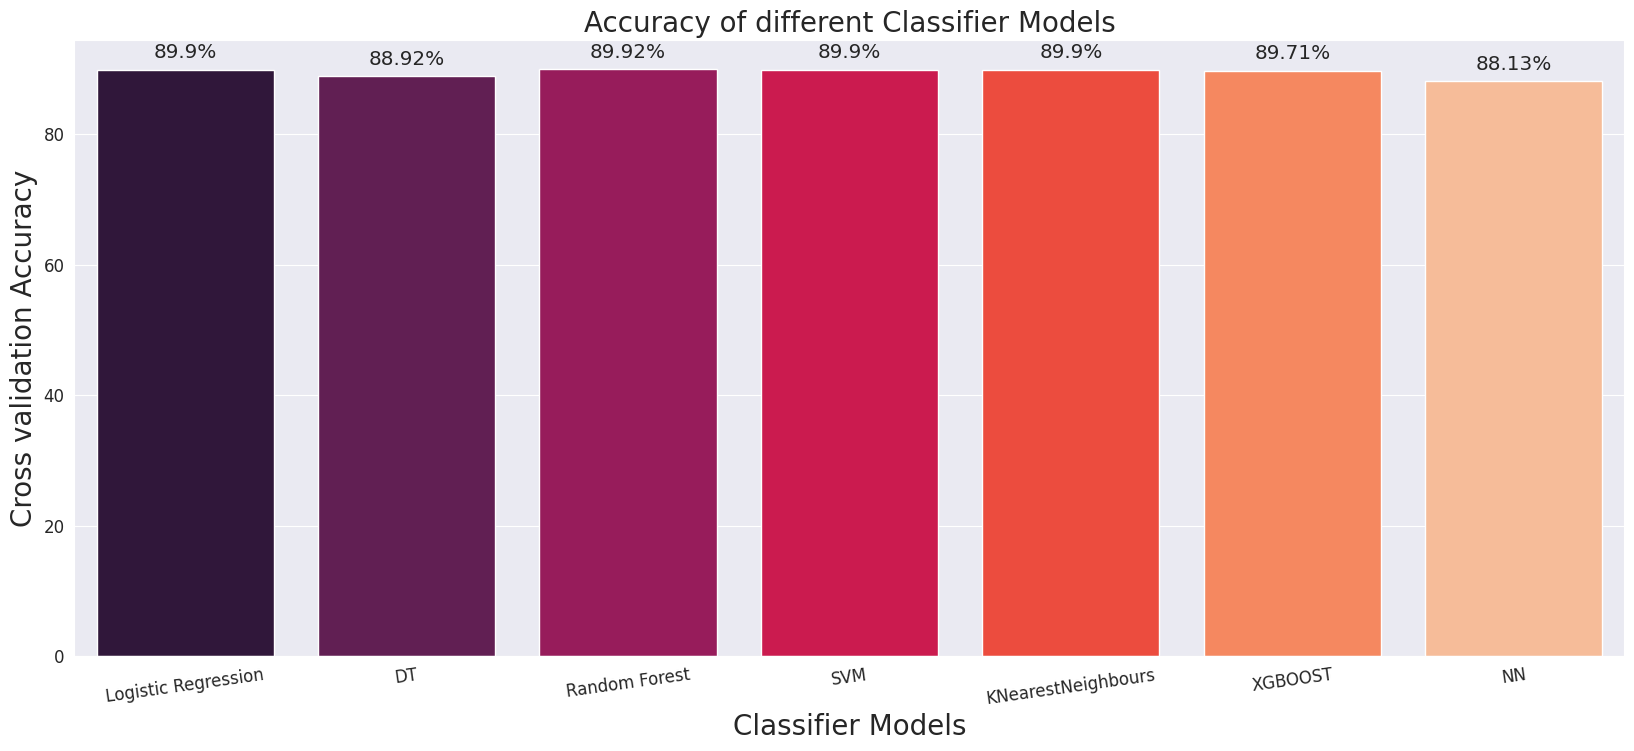

In [ ]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=cross_acc, palette = "rocket", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('Cross validation Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

Admission to ward (Covid-19 Patients)

In [ ]:
covid_positive = dataset[dataset['sars-cov-2_exam_result'] == 1]

In [ ]:
admission = []

def multiclass_target(row):
    check = 0
    check += 1 if (row['patient_addmited_to_regular_ward_(1=yes,_0=no)'] == 1) else 0
    check += 2 if (row['patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)'] == 1) else 0
    check += 3 if (row['patient_addmited_to_intensive_care_unit_(1=yes,_0=no)'] == 1) else 0
    row['target'] = check
    return row

data_adm = covid_positive.apply(multiclass_target, axis=1)
data_adm

,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,serum_glucose,respiratory_syncytial_virus,mycoplasma_pneumoniae,...,vitamin_b12,creatine_phosphokinase (cpk),ferritin,arterial_lactic_acid,lipase_dosage,d-dimer,albumin,arteiral_fio2,phosphor,target
67,2704.0,7.0,1.0,0.0,0.0,0.0,-999.000000,-999.0,0.0,-999.0,...,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
284,4796.0,16.0,1.0,1.0,0.0,0.0,-999.000000,-999.0,2.0,-999.0,...,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.0
513,3969.0,10.0,1.0,0.0,0.0,0.0,-999.000000,-999.0,2.0,-999.0,...,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
568,1569.0,2.0,1.0,0.0,0.0,0.0,0.991838,-999.0,2.0,-999.0,...,-999.0,0.125483,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
676,4718.0,15.0,1.0,0.0,0.0,0.0,-999.000000,-999.0,0.0,-999.0,...,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,2117.0,16.0,1.0,0.0,0.0,0.0,-999.000000,-999.0,0.0,-999.0,...,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
5633,3568.0,4.0,1.0,0.0,0.0,0.0,-999.000000,-999.0,0.0,-999.0,...,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
5634,4877.0,15.0,1.0,0.0,0.0,0.0,-999.000000,-999.0,0.0,-999.0,...,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
5639,3892.0,3.0,1.0,0.0,0.0,0.0,-999.000000,-999.0,0.0,-999.0,...,-999.0,-999.000000,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0


In [ ]:
X = data_adm[feat_head.index]
y = data_adm['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

ML Models for Ward Prediction!

In [ ]:
acc_lst = []

def model_assess(model, name='Default'):
    model.fit(X_train, y_train)
    prds = model.predict(X_test)
    model_acc = accuracy_score(y_test, prds)
    acc_lst.append(100*model_acc)
    print('---', name, '---', '\n',
          confusion_matrix(y_test, prds), '\n',
          'Accuracy:', (accuracy_score(y_test, prds)), '\n',
          'Classification Report:', (classification_report(y_test, prds)))

In [ ]:
# Logistic Regression
lg = LogisticRegression()
model_assess(lg, 'Logistic Regression')

# Decision Tree
tree = DecisionTreeClassifier()
model_assess(tree, 'Decission Trees')

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, 'Random Forest')

# SVM
svm = SVC()
model_assess(svm, 'SVM')

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, name='KNN')

# XGBOOST
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, 'XGBoost')

# Neural Network
nn = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1)
model_assess(nn, 'Neural Nets')

--- Logistic Regression --- 
 [[146   5   0   1]
 [  4   4   2   0]
 [  0   1   1   0]
 [  2   2   0   0]] 
 Accuracy: 0.8988095238095238 
 Classification Report:               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       152
         1.0       0.33      0.40      0.36        10
         2.0       0.33      0.50      0.40         2
         3.0       0.00      0.00      0.00         4

    accuracy                           0.90       168
   macro avg       0.41      0.47      0.43       168
weighted avg       0.89      0.90      0.90       168

--- Decission Trees --- 
 [[147   5   0   0]
 [  4   4   2   0]
 [  0   1   1   0]
 [  0   4   0   0]] 
 Accuracy: 0.9047619047619048 
 Classification Report:               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       152
         1.0       0.29      0.40      0.33        10
         2.0       0.33      0.50      0.40         2
         3.0       0.00   

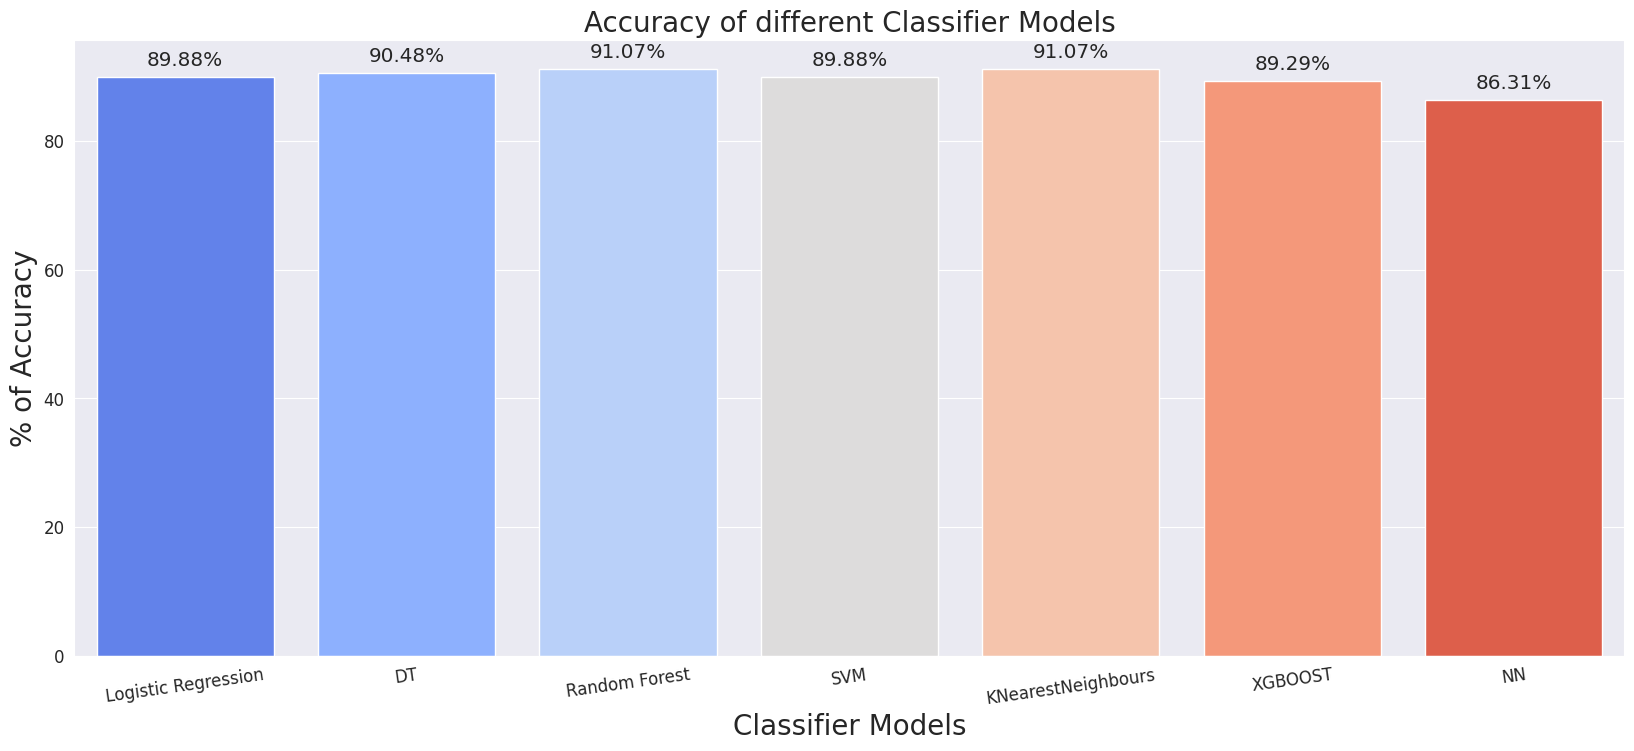

In [ ]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y = acc_lst, palette = "coolwarm", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

**Logistic Regression, SVM & KNN were the top performers in predicting Covid 19 with an accuracy of 90.55%. While predicting Covid 19 patients admission to the ward Logistic Regression, RF, XGBoost were the best performers. This dataset is imbalanced with only 10% people having Covid 19. The performance of these models could be better in a more balanced dataset.**

**Cheers!**